<a href="https://colab.research.google.com/github/Ali-mohammadi-design/ML-practice/blob/main/Fashion_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fashion_train_df= pd.read_csv('/content/fashion-mnist_train.csv')
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
fashion_test_df= pd.read_csv('/content/fashion-mnist_test.csv')
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Note: in the dataset, each row demonstrates a picture and each columns is representing the value of that specific pixel. all pictures have (28*28) pixels that is why we have 784 pixel columns. The label is representing the photo number

In [4]:
type(fashion_train_df)

pandas.core.frame.DataFrame

In [5]:
fashion_train_df.shape

(60000, 785)

As we can see we have 60000 photos and 784 pixels and onel label column

In [6]:
fashion_test_df.shape

(10000, 785)

Converting datafram to array

In [35]:
training= np.array(fashion_train_df, dtype='float32')

In [8]:
type(training)

numpy.ndarray

In [9]:
testing= np.array(fashion_test_df, dtype='float32')

In [39]:
type(testing)

numpy.ndarray

Showing img randomly

Using reshape() to frame data as 28 arrays that every one has 28 data

the label is 2.0
this is the img number 716


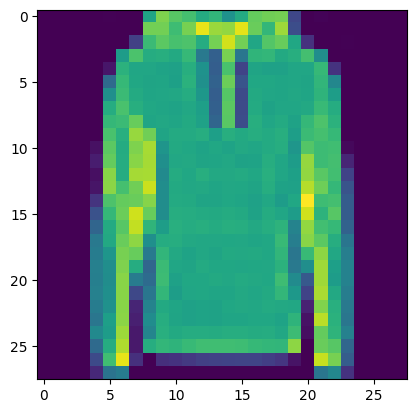

In [11]:
import random
i=random.randint(1,6000)
plt.imshow(training[i,1:].reshape(28,28))
label=training[i,0]
print(f"the label is {label}")
print(f"this is the img number {i}")

Good definition about convolution and max pulling, densing and flatting on second prj on "Machine Learning Practical" in Udemy

Training

In [36]:
x_train= training[:,1:]/255
y_train= training[:,0]
y_train.shape

(60000,)

In [44]:
x_test= testing[:,1:]/255
y_test= testing[:,0]
x_train.shape

(60000, 784)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_validate, y_train,y_validate = train_test_split(x_train,y_train, test_size=0.2, random_state= 12345)

In [47]:
x_train.shape

(48000, 784)

In [48]:
x_train=x_train.reshape(x_train.shape[0], *(28,28,1))
x_test=x_test.reshape(x_test.shape[0], *(28,28,1))
x_validate=x_validate.reshape(x_validate.shape[0], *(28,28,1))

In [49]:
x_train.shape

(48000, 28, 28, 1)

In [50]:
x_test.shape

(10000, 28, 28, 1)

In [51]:
x_validate.shape

(12000, 28, 28, 1)

Training the model with tensorflow and keras

In [21]:
import keras

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam


cnn means convolutional neural network

In [23]:
cnn_model= Sequential()

In [24]:
cnn_model.add(Conv2D(32,3,3, input_shape=(28, 28,1), activation= 'relu'))

In [25]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [26]:
cnn_model.add(Flatten())

In [27]:
cnn_model.add(Dense(units=32, activation='relu'))

In [28]:
cnn_model.add(Dense(units=10, activation='sigmoid'))

In [29]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [30]:
epochs=50

In [31]:
cnn_model.fit(x_train, y_train, batch_size=512, epochs=epochs, verbose=1, validation_data= (x_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 3s 23ms/step - loss: 1.3569 - accuracy: 0.5743 - val_loss: 0.7819 - val_accuracy: 0.7197
Epoch 2/50
94/94 [==============================] - 1s 15ms/step - loss: 0.6984 - accuracy: 0.7519 - val_loss: 0.6520 - val_accuracy: 0.7684
Epoch 3/50
94/94 [==============================] - 1s 15ms/step - loss: 0.6069 - accuracy: 0.7817 - val_loss: 0.5825 - val_accuracy: 0.7924
Epoch 4/50
94/94 [==============================] - 1s 15ms/step - loss: 0.5613 - accuracy: 0.7968 - val_loss: 0.5494 - val_accuracy: 0.8051
Epoch 5/50
94/94 [==============================] - 1s 14ms/step - loss: 0.5295 - accuracy: 0.8090 - val_loss: 0.5207 - val_accuracy: 0.8132
Epoch 6/50
94/94 [==============================] - 1s 15ms/step - loss: 0.5073 - accuracy: 0.8158 - val_loss: 0.4986 - val_accuracy: 0.8216
Epoch 7/50
94/94 [==============================] - 1s 15ms/step - loss: 0.4905 - accuracy: 0.8225 - val_loss: 0.4948 - val_accuracy: 0.8214
Epoch 8/50
94

In [52]:
evaluation= cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3551 - accuracy: 0.8686


In [53]:
evaluation[1]

0.8686000108718872

In [76]:
x_test.shape

(10000, 28, 28, 1)

In [79]:
y_test.shape

(10000,)

In [80]:
predict_x=cnn_model.predict(x_test)
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 0s 1ms/step


In [81]:
classes_x

array([0, 1, 2, ..., 8, 8, 1])

<Axes: >

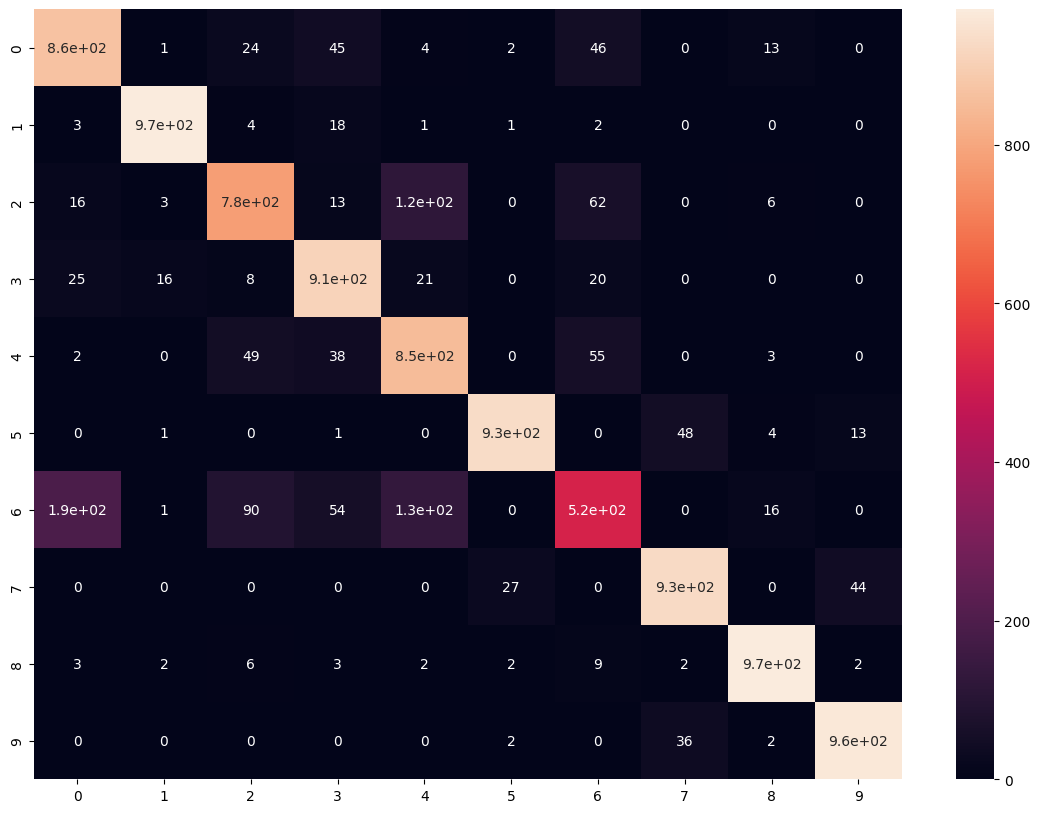

In [87]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, classes_x)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True)